In [1]:
#By timetraveler :)

In [2]:
import pandas as pd
import pandas_datareader as dr
import matplotlib.ticker as mtick
%matplotlib inline

In [3]:
today = pd.to_datetime('today')
today

Timestamp('2019-11-15 12:05:41.170225')

In [4]:
df = dr.data.get_data_yahoo('VTI', start='2000-01-01', end=today)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-06-15,56.005001,55.174999,55.424999,55.665001,1067400.0,39.560894
2001-06-18,55.915001,55.310001,55.814999,55.310001,282600.0,39.308609
2001-06-19,56.165001,55.235001,56.150002,55.465000,1777600.0,39.418774
2001-06-20,56.075001,55.375000,55.375000,56.049999,476000.0,39.834538
2001-06-21,56.724998,55.875000,56.000000,56.500000,240400.0,40.154324
...,...,...,...,...,...,...
2019-11-11,156.929993,156.250000,156.399994,156.850006,1738900.0,156.850006
2019-11-12,157.690002,156.740005,157.029999,157.119995,1730700.0,157.119995
2019-11-13,157.389999,156.389999,156.570007,157.190002,2189400.0,157.190002


In [5]:
grouper = df.groupby([df.index.year, df.index.month])
data = []
for g, gdf in grouper:
    data.append(gdf.index.min())

In [6]:
mdf = df[df.index.to_series().isin(data)]
mdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-06-15,56.005001,55.174999,55.424999,55.665001,1067400.0,39.560894
2001-07-02,56.970001,56.299999,56.299999,56.650002,290000.0,40.361584
2001-08-01,55.970001,55.474998,55.599998,55.660000,237400.0,39.656246
2001-09-04,53.035000,51.900002,52.169998,51.900002,71600.0,36.977337
2001-10-01,47.299999,46.654999,47.099998,47.044998,922000.0,33.637947
...,...,...,...,...,...,...
2019-07-01,151.919998,150.509995,151.850006,151.149994,3960800.0,150.460587
2019-08-01,153.850006,150.259995,152.289993,150.800003,3901500.0,150.112183
2019-09-03,148.550003,147.369995,147.990005,148.070007,4307800.0,147.394638


In [7]:
sdf = pd.DataFrame(index=mdf.index, columns = ["lump sum", "DCA 12 months", "DCA 24 months"])
endv = df["Adj Close"].iloc[-1]     #Value of VTI at today's Adjusted Close

In [8]:
#lump sum
for i in range(len(mdf)-24) : 
    startv = mdf["Adj Close"].iloc[i]
    sdf.iloc[i, 0] = endv / startv * 100

#DCA over 12 months
for i in range(len(mdf)-24) :     
    windf = mdf.iloc[i:i+12, -1]
    xdf = endv / windf
    ddf = windf / windf.sum()
    sdf.iloc[i, 1] = (xdf * ddf).sum() * 100

#DCA over 24 months
for i in range(len(mdf)-24) :     
    windf = mdf.iloc[i:i+24, -1]
    xdf = endv / windf
    ddf = windf / windf.sum()
    sdf.iloc[i, 2] = (xdf * ddf).sum() * 100

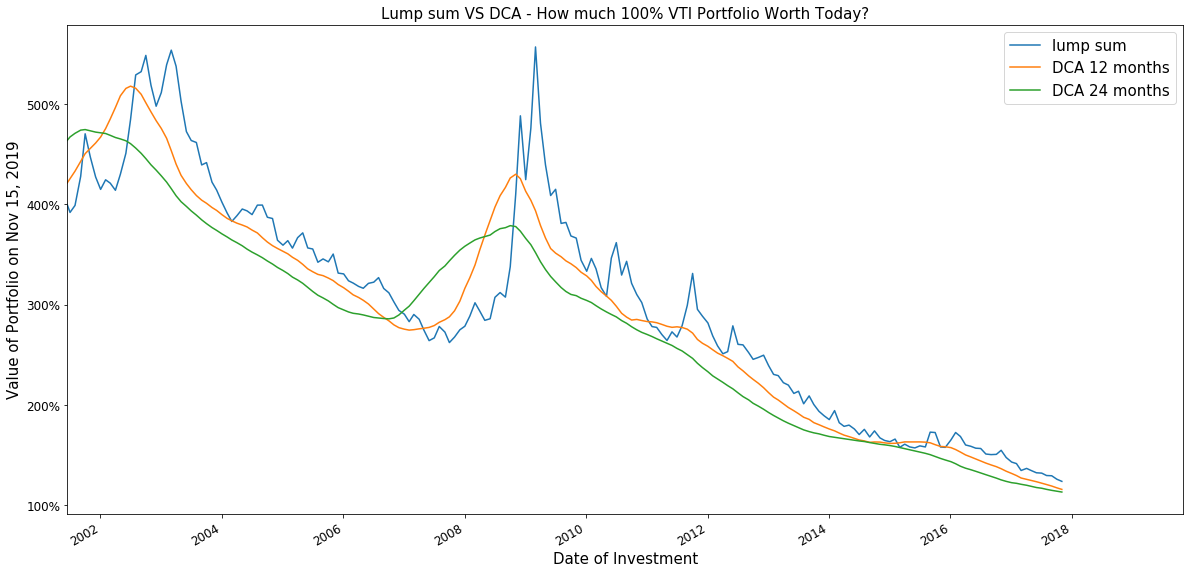

In [9]:
ax = sdf.plot(figsize=(20,10), fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Value of Portfolio on " + today.date().strftime("%b %d, %Y"), fontsize=15)
ax.set_xlabel("Date of Investment", fontsize=15)
ax.set_title("Lump sum VS DCA - How much 100% VTI Portfolio Worth Today?", fontsize=15)
ax.legend(prop=dict(size=15))

In [10]:
fig = ax.get_figure()
fig.savefig('lumpsum_dca.png')